1) IMPORT NECESSARY LIBRARIES

In [208]:
import pandas as pd
import numpy as np

2) READ THE CSV FILE

In [210]:
import pandas as pd
df = pd.read_csv('test.csv.zip')

3) PRINT FIRST  FIVE ROWS

In [212]:
print(df.head())

       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0      

In [214]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [215]:
print(df.describe())

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           42502.000000       50000.000000     50000.000000   
mean             4182.004291          16.838260        22.921480   
std              3174.109304         116.396848       129.314804   
min               303.645417          -1.000000         0.000000   
25%              1625.188333           3.000000         4.000000   
50%              3086.305000           6.000000         5.000000   
75%              5934.189094           7.000000         7.000000   
max             15204.633333        1798.000000      1499.000000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count   50000.000000         50000.000000          48965.000000   
mean       68.772640            21.052640             30.080200   
std       451.602363            14.860397            196.984121   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000           

4) HANDLING MISSING VALUES

In [217]:
print(df.isnull().sum())
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64
ID                          0
Customer_ID                 0
Month                       0
Name  

5) CONVERSION OF CATEGORIAL VALUES INTO NUMERICAL FORMAT

In [219]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical columns: {list(categorical_cols)}")
print("\n--- METHOD 1: Label Encoding ---")
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_encoded[f"{col}_label"] = label_encoder.fit_transform(df[col].astype(str))
    unique_values = df[col].unique()[:3] 
    mapping = {val: label_encoder.transform([str(val)])[0] for val in unique_values}
    print(f"Column '{col}' mapping sample: {mapping}")
print("\nOriginal dataframe sample:")
print(df[categorical_cols].head())
print("\nEncoded dataframe sample (with new columns):")
print(df_encoded.head())

Categorical columns: ['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation', 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']

--- METHOD 1: Label Encoding ---
Column 'ID' mapping sample: {'0x160a': 8246, '0x160b': 8251, '0x160c': 8258}
Column 'Customer_ID' mapping sample: {'CUS_0xd40': 12320, 'CUS_0x21b1': 1066, 'CUS_0x2dbc': 1885}
Column 'Month' mapping sample: {'September': 3, 'October': 2, 'November': 1}
Column 'Name' mapping sample: {'Aaron Maashoh': 84, 'Rick Rothackerj': 7491, 'Langep': 4940}
Column 'Age' mapping sample: {'23': 156, '24': 171, '24_': 183}
Column 'SSN' mapping sample: {'821-00-0265': 10205, '004-07-5839': 53, '#F%$D@*&8': 0}
Column 'Occupation' mapping sample: {'Scientist': 12, '_______': 15, 'Teacher': 13}
Column 'Annual_Income' mapping sample: {'19114.12': 

6) FEATURE SELECTION

In [221]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
data = pd.DataFrame({
    'feature1': [10, 20, 30, 40, 50],
    'feature2': [1, 2, 3, 4, 5],
    'feature3': [100, 200, 300, 400, 500]
})
print("Original data statistics:")
print(data.describe())
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
print("\nScaled data statistics:")
print(scaled_df.describe())

Original data statistics:
        feature1  feature2    feature3
count   5.000000  5.000000    5.000000
mean   30.000000  3.000000  300.000000
std    15.811388  1.581139  158.113883
min    10.000000  1.000000  100.000000
25%    20.000000  2.000000  200.000000
50%    30.000000  3.000000  300.000000
75%    40.000000  4.000000  400.000000
max    50.000000  5.000000  500.000000

Scaled data statistics:
       feature1  feature2  feature3
count  5.000000  5.000000  5.000000
mean   0.000000  0.000000  0.000000
std    1.118034  1.118034  1.118034
min   -1.414214 -1.414214 -1.414214
25%   -0.707107 -0.707107 -0.707107
50%    0.000000  0.000000  0.000000
75%    0.707107  0.707107  0.707107
max    1.414214  1.414214  1.414214


7)  SPLITTING OF DATASET INTO TRAINING AND TESTING

In [223]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'feature3': np.random.rand(100),
    'target': np.random.randint(0, 2, 100)
})
X = data.drop('target', axis=1)  
y = data['target']          
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Complete dataset shape: {data.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nClass distribution in original data:")
print(y.value_counts(normalize=True))
print("\nClass distribution in training set (stratified):")
print(y_train_stratified.value_counts(normalize=True))
print("\nClass distribution in test set (stratified):")
print(y_test_stratified.value_counts(normalize=True))

Complete dataset shape: (100, 4)
X_train shape: (80, 3)
X_test shape: (20, 3)
y_train shape: (80,)
y_test shape: (20,)

Class distribution in original data:
target
1    0.54
0    0.46
Name: proportion, dtype: float64

Class distribution in training set (stratified):
target
1    0.5375
0    0.4625
Name: proportion, dtype: float64

Class distribution in test set (stratified):
target
1    0.55
0    0.45
Name: proportion, dtype: float64


8) CORRELATION MATRIX

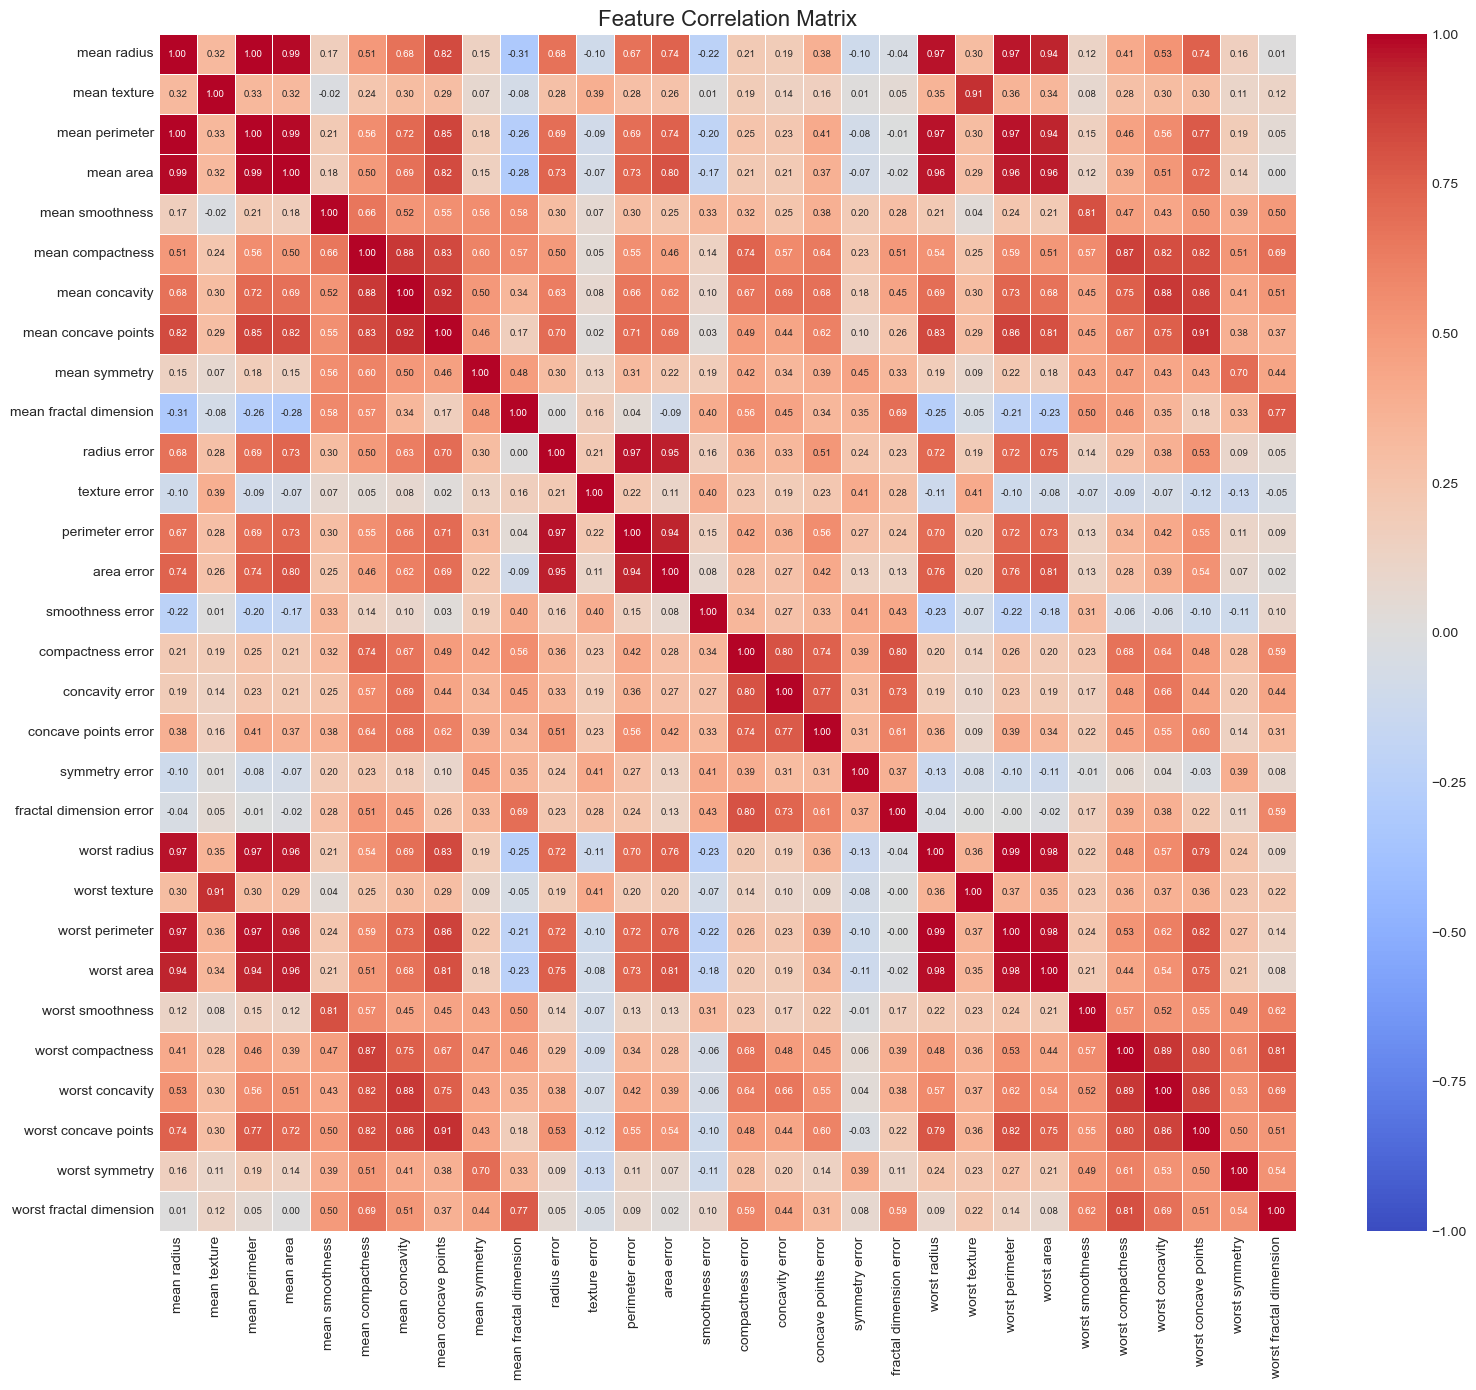

In [225]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
correlation_matrix = df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(
    correlation_matrix,
    annot=True,           
    fmt='.2f',           
    cmap='coolwarm',      
    vmin=-1,              
    vmax=1,               
    linewidths=0.5,       
    annot_kws={"size": 7} 
)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

9) ML MODELS -

A) RANDOM FOREST CLASSIFIER

Accuracy: 0.9720
Precision: 0.9670
Recall: 0.9888
F1 Score: 0.9778
Log Loss: 0.0954

Confusion Matrix:
[[51  3]
 [ 1 88]]


<Figure size 800x600 with 0 Axes>

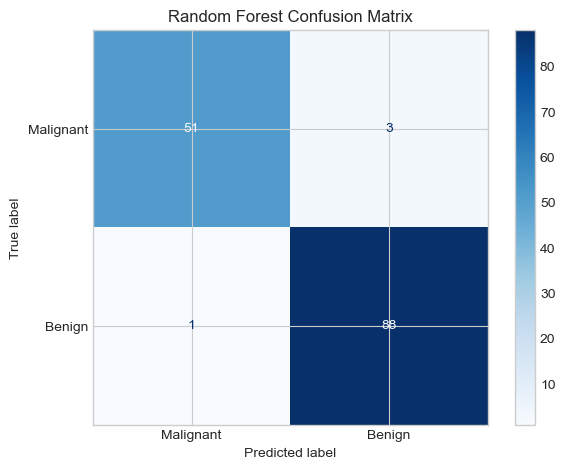


Classification Report:
              precision    recall  f1-score   support

   Malignant       0.98      0.94      0.96        54
      Benign       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [228]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign']).plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.tight_layout()
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Malignant', 'Benign']))



B) LOGISTIC REGRESSION

Accuracy: 0.9790
Precision: 0.9886
Recall: 0.9775
F1 Score: 0.9831
Log Loss: 0.0648

Confusion Matrix:
[[53  1]
 [ 2 87]]


<Figure size 800x600 with 0 Axes>

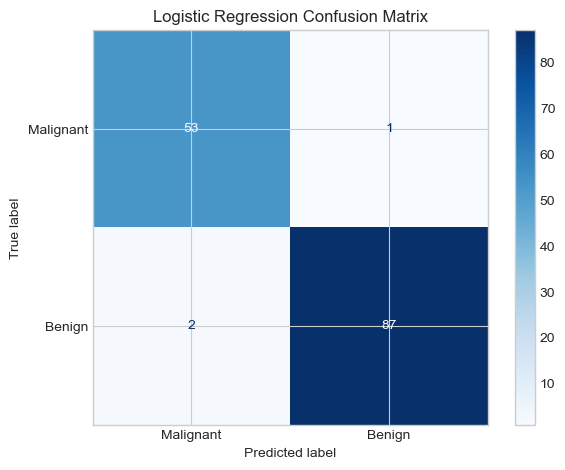

In [230]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_model = LogisticRegression(
    C=1.0,               
    penalty='l2',       
    solver='lbfgs',      
    max_iter=1000,        
    random_state=42
)
lr_model.fit(X_train_scaled, y_train)


y_pred = lr_model.predict(X_test_scaled)
y_pred_proba = lr_model.predict_proba(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign']).plot(cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()



C) DECISION TREE CLASSIFIER

Accuracy: 0.9510
Precision: 0.9659
Recall: 0.9551
F1 Score: 0.9605
Log Loss: 1.0943

Confusion Matrix:
[[51  3]
 [ 4 85]]


<Figure size 800x600 with 0 Axes>

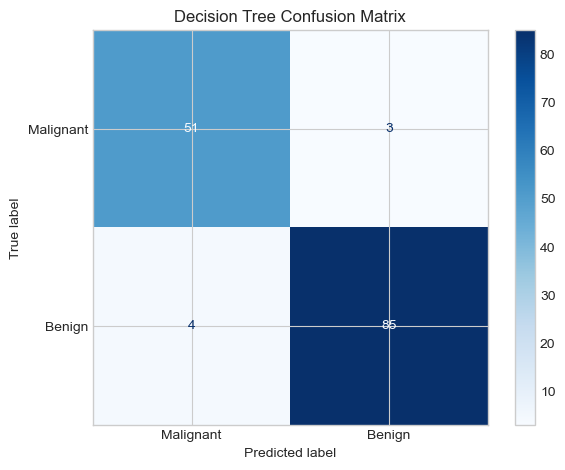

In [232]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, confusion_matrix, classification_report,
    ConfusionMatrixDisplay
)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
dt_model = DecisionTreeClassifier(
    max_depth=5,              
    min_samples_split=5,      
    min_samples_leaf=2,      
    criterion='gini',         
    random_state=42
)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant', 'Benign']).plot(cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
plt.show()



D) GRADIENT BOOSTING

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, log_loss, confusion_matrix, 
                            classification_report, ConfusionMatrixDisplay)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, 
                                     max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
cm = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")


Accuracy: 0.9100
Precision: 0.9130
Recall: 0.8936
F1 Score: 0.9032
Log Loss: 0.2473


E) XG BOOST CLASSIFIER

Performance Metrics for XGBoost Model:
Accuracy: 0.9510
Precision: 0.9659
Recall: 0.9551
F1 Score: 0.9605
Log Loss: 0.1075

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



<Figure size 800x600 with 0 Axes>

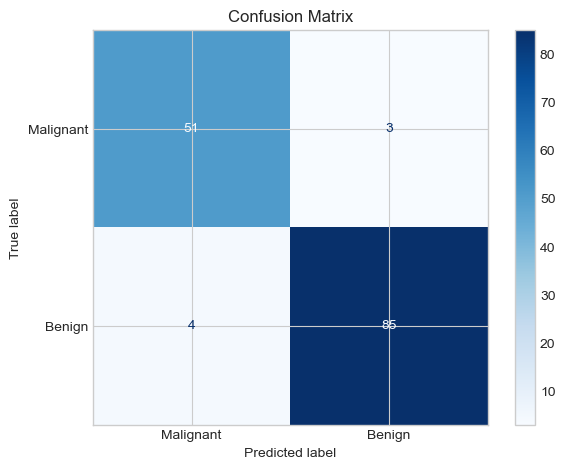

In [236]:

import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, log_loss, confusion_matrix, 
                            classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import seaborn as sns
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    random_state=42
)

xgb_model.fit(X_train, y_train)


y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Performance Metrics for XGBoost Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Malignant', 'Benign'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()



F) CAT BOOST CLASIFIER

CatBoost Performance Metrics:
Accuracy: 0.8700
Precision: 0.8973
Recall: 0.8452
F1 Score: 0.8704
Log Loss: 0.3538

Confusion Matrix:
[[130  15]
 [ 24 131]]


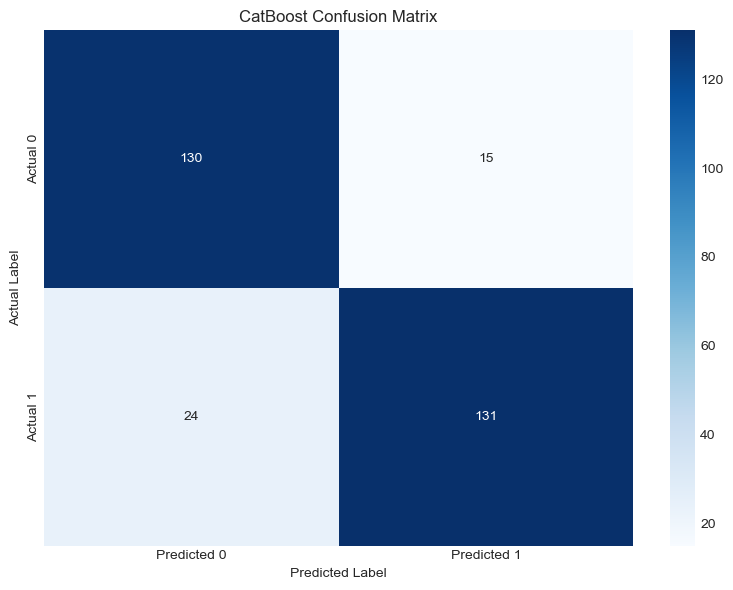

In [238]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"CatBoost Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('CatBoost Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()



G) LG BOOST CLASSIFIER

LightGBM Performance Metrics:
Accuracy: 0.8833
Precision: 0.9167
Recall: 0.8516
F1 Score: 0.8829
Log Loss: 0.3750

Confusion Matrix:
[[133  12]
 [ 23 132]]

Metrics Summary Table:
   Metric    Value
 Accuracy 0.883333
Precision 0.916667
   Recall 0.851613
 F1 Score 0.882943
 Log Loss 0.374977


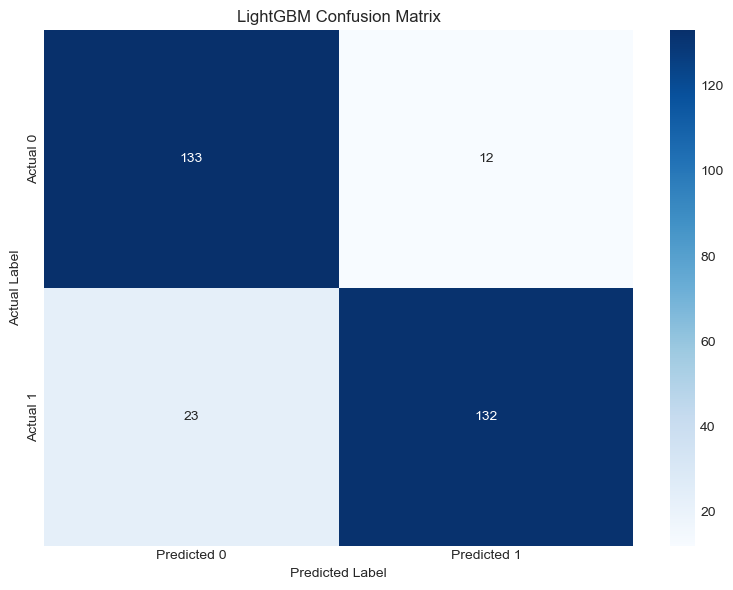

In [240]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=-1  
)
lgbm_model.fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
y_pred_proba = lgbm_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
print("LightGBM Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss'],
    'Value': [accuracy, precision, recall, f1, logloss]
})
print("\nMetrics Summary Table:")
print(metrics_df.to_string(index=False))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('LightGBM Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

H) KNN 

KNN Performance Metrics:
Accuracy: 0.8033
Precision: 0.8478
Recall: 0.7548
F1 Score: 0.7986
Log Loss: 1.3055

Confusion Matrix:
[[124  21]
 [ 38 117]]

Metrics Summary Table:
   Metric    Value
 Accuracy 0.803333
Precision 0.847826
   Recall 0.754839
 F1 Score 0.798635
 Log Loss 1.305456


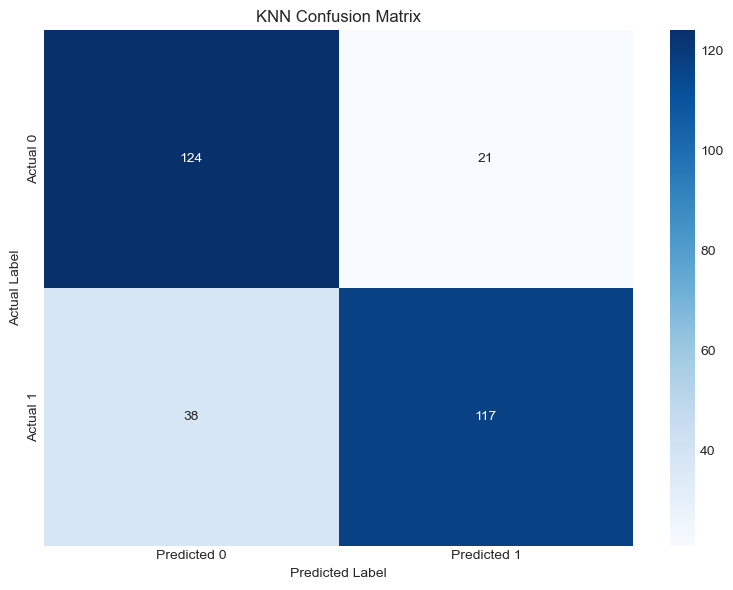

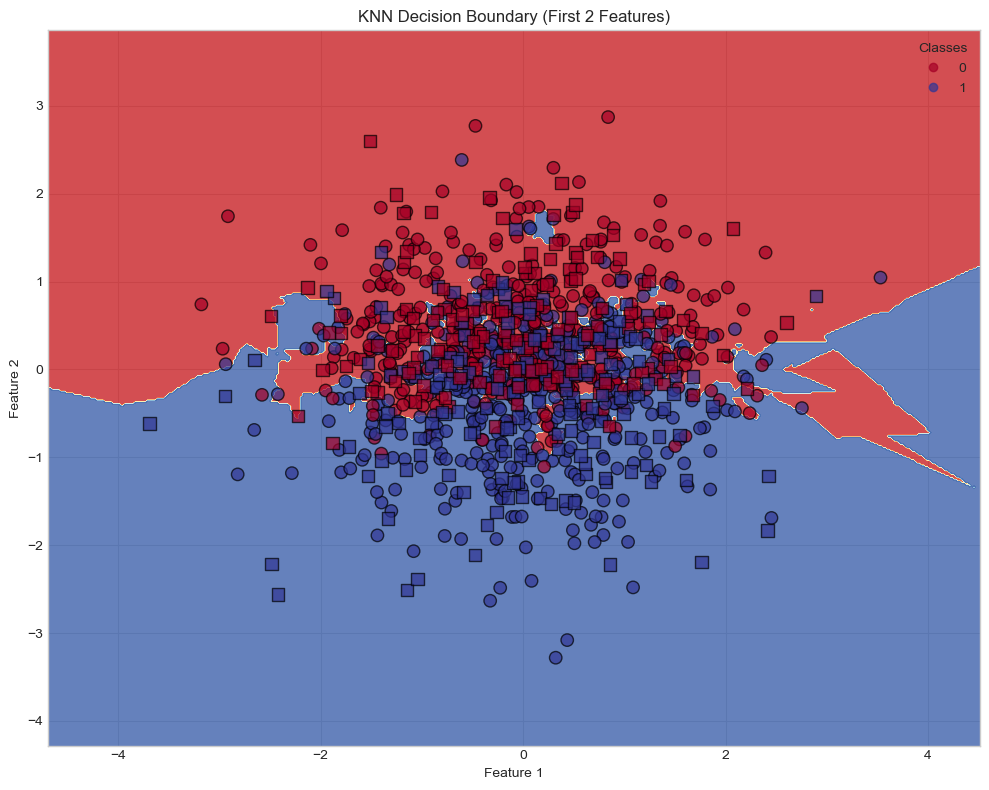

In [242]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
y_pred_proba = knn_model.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Log Loss'],
    'Value': [accuracy, precision, recall, f1, logloss]
})
print("\nMetrics Summary Table:")
print(metrics_df.to_string(index=False))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()
if X.shape[1] > 2:
    X_vis = X[:, :2]
    X_train_vis, X_test_vis = X_train[:, :2], X_test[:, :2]
    knn_vis = KNeighborsClassifier(n_neighbors=5)
    knn_vis.fit(X_train_vis, y_train)
    
    
    h = 0.02  
    x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
    y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    
    
    scatter = plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, 
                         edgecolors='k', marker='o', s=80, alpha=0.7, cmap=plt.cm.RdYlBu)
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, 
               edgecolors='k', marker='s', s=80, alpha=0.7, cmap=plt.cm.RdYlBu)
    
    plt.title('KNN Decision Boundary (First 2 Features)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.tight_layout()
    plt.show()

10) TABLE FOR COMPARISON

In [244]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'KNN': KNeighborsClassifier()
}
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Log Loss': []
}


for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    results['Model'].append(name)
    results['Accuracy'].append(round(accuracy_score(y_test, y_pred), 4))
    results['Precision'].append(round(precision_score(y_test, y_pred), 4))
    results['Recall'].append(round(recall_score(y_test, y_pred), 4))
    results['F1 Score'].append(round(f1_score(y_test, y_pred), 4))
    results['Log Loss'].append(round(log_loss(y_test, y_pred_proba), 4))


results_df = pd.DataFrame(results)


print("\nModel Performance Comparison:")
print(results_df)



Training Random Forest...
Training Logistic Regression...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training LightGBM...
Training KNN...

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1 Score  Log Loss
0        Random Forest     0.900     0.8776  0.9149    0.8958    0.3165
1  Logistic Regression     0.825     0.8172  0.8085    0.8128    0.3701
2    Gradient Boosting     0.910     0.9130  0.8936    0.9032    0.2473
3              XGBoost     0.915     0.9140  0.9043    0.9091    0.1757
4             CatBoost     0.935     0.9175  0.9468    0.9319    0.1664
5             LightGBM     0.910     0.9043  0.9043    0.9043    0.1883
6                  KNN     0.900     0.8558  0.9468    0.8990    0.3901


*) ROC

Training Random Forest...
Training Logistic Regression...
Training Gradient Boosting...
Training XGBoost...
Training CatBoost...
Training LightGBM...
Training KNN...

AUC Values for Each Model:
              Model      AUC
           CatBoost 0.988358
            XGBoost 0.982537
           LightGBM 0.980831
      Random Forest 0.973454
  Gradient Boosting 0.968788
                KNN 0.966128
Logistic Regression 0.913689


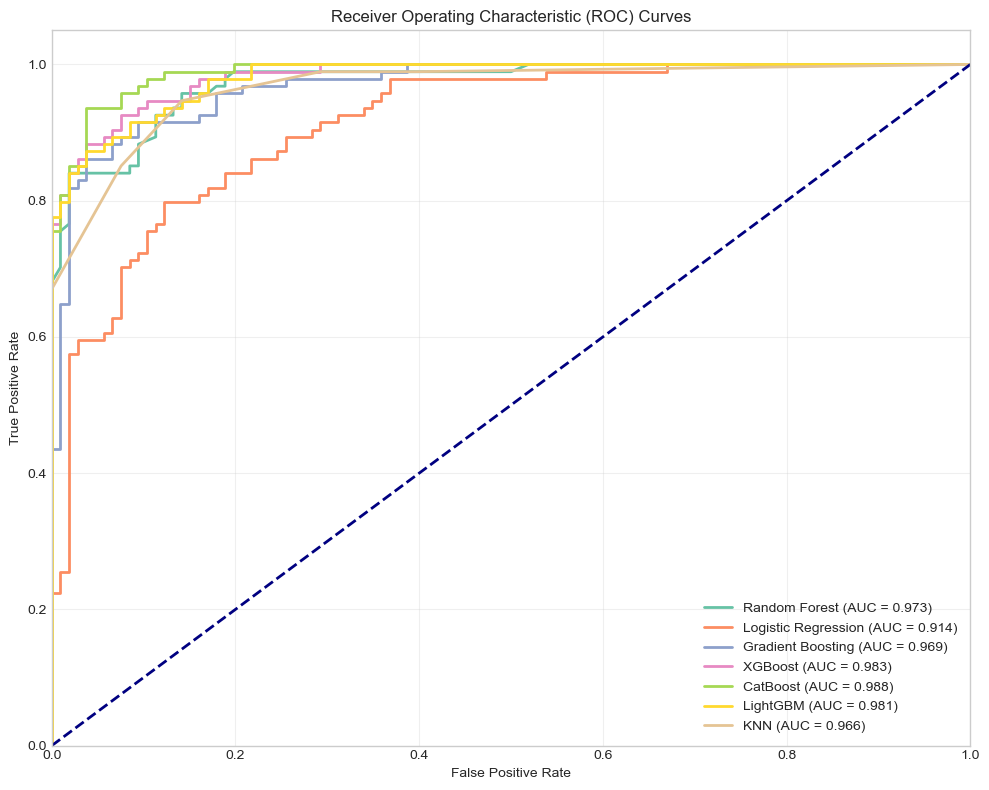

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
np.random.seed(42)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                          n_redundant=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, verbosity=0),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'KNN': KNeighborsClassifier()
}

roc_data = {}


plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    roc_data[name] = {
        'fpr': fpr,
        'tpr': tpr,
        'auc': roc_auc
    }
    
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
auc_values = {
    'Model': list(models.keys()),
    'AUC': [roc_data[model]['auc'] for model in models.keys()]
}

auc_df = pd.DataFrame(auc_values).sort_values(by='AUC', ascending=False)
print("\nAUC Values for Each Model:")
print(auc_df.to_string(index=False))
plt.tight_layout()
plt.show()

HYPER PARAMETER TUNNING

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best cross-validation score: 0.9313
Test set accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       104
           1       0.86      0.95      0.90        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



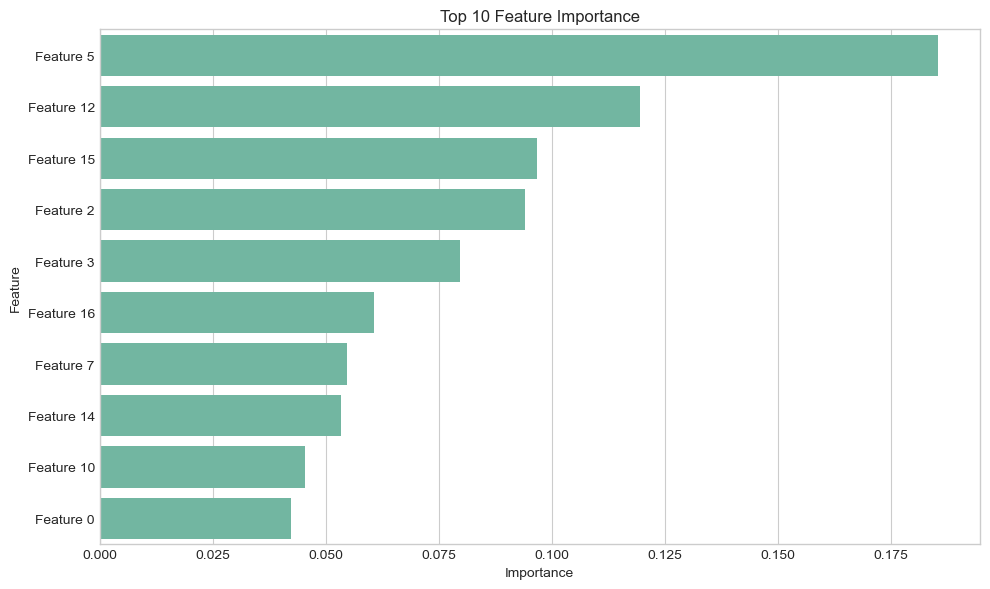

In [248]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(42)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                          n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test set accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
feature_importances = best_model.named_steps['classifier'].feature_importances_
feature_names = [f'Feature {i}' for i in range(X.shape[1])]
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df[:10])
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

CAT BOOST HAS HIGHEST ACCURACY OF 93.5% WITH HIGHEST ROC VALUE OF 0.988   .